In [1]:
import pandas as pd
import pymysql

db_name = 'mavenfuzzyfactory'
db_host = 'localhost'
db_username = 'root'
db_password = 'Mukul@ms30'

try:
    conn=pymysql.connect(host=db_host,port=int(3306),user='root',passwd=db_password,db=db_name)
except e:
    print(e)
    

## Situation
You’ve just been hired as an
eCommerce Database Analyst for Maven Fuzzy Factory , an online
retailer which has just launched their first product.

## BRIEF
As a member of the startup team, you will work with the
CEO , the Head of Marketing , and the
Website Manager to help steer the business.
You will analyze and optimize marketing channels, measure and test website conversion
performance, and use data to understand the impact of new product launches.

## OBJECTIVE
Use SQL to:
•Access and explore the Maven Fuzzy Factory database
•Become the data expert for the company, and the go to person for mission critical analyses
•Analyze and optimize the business’ marketing channels, website, and product portfolio

## OVERVIEW OF THE MAVEN FUZZY FACTORY DATABASE
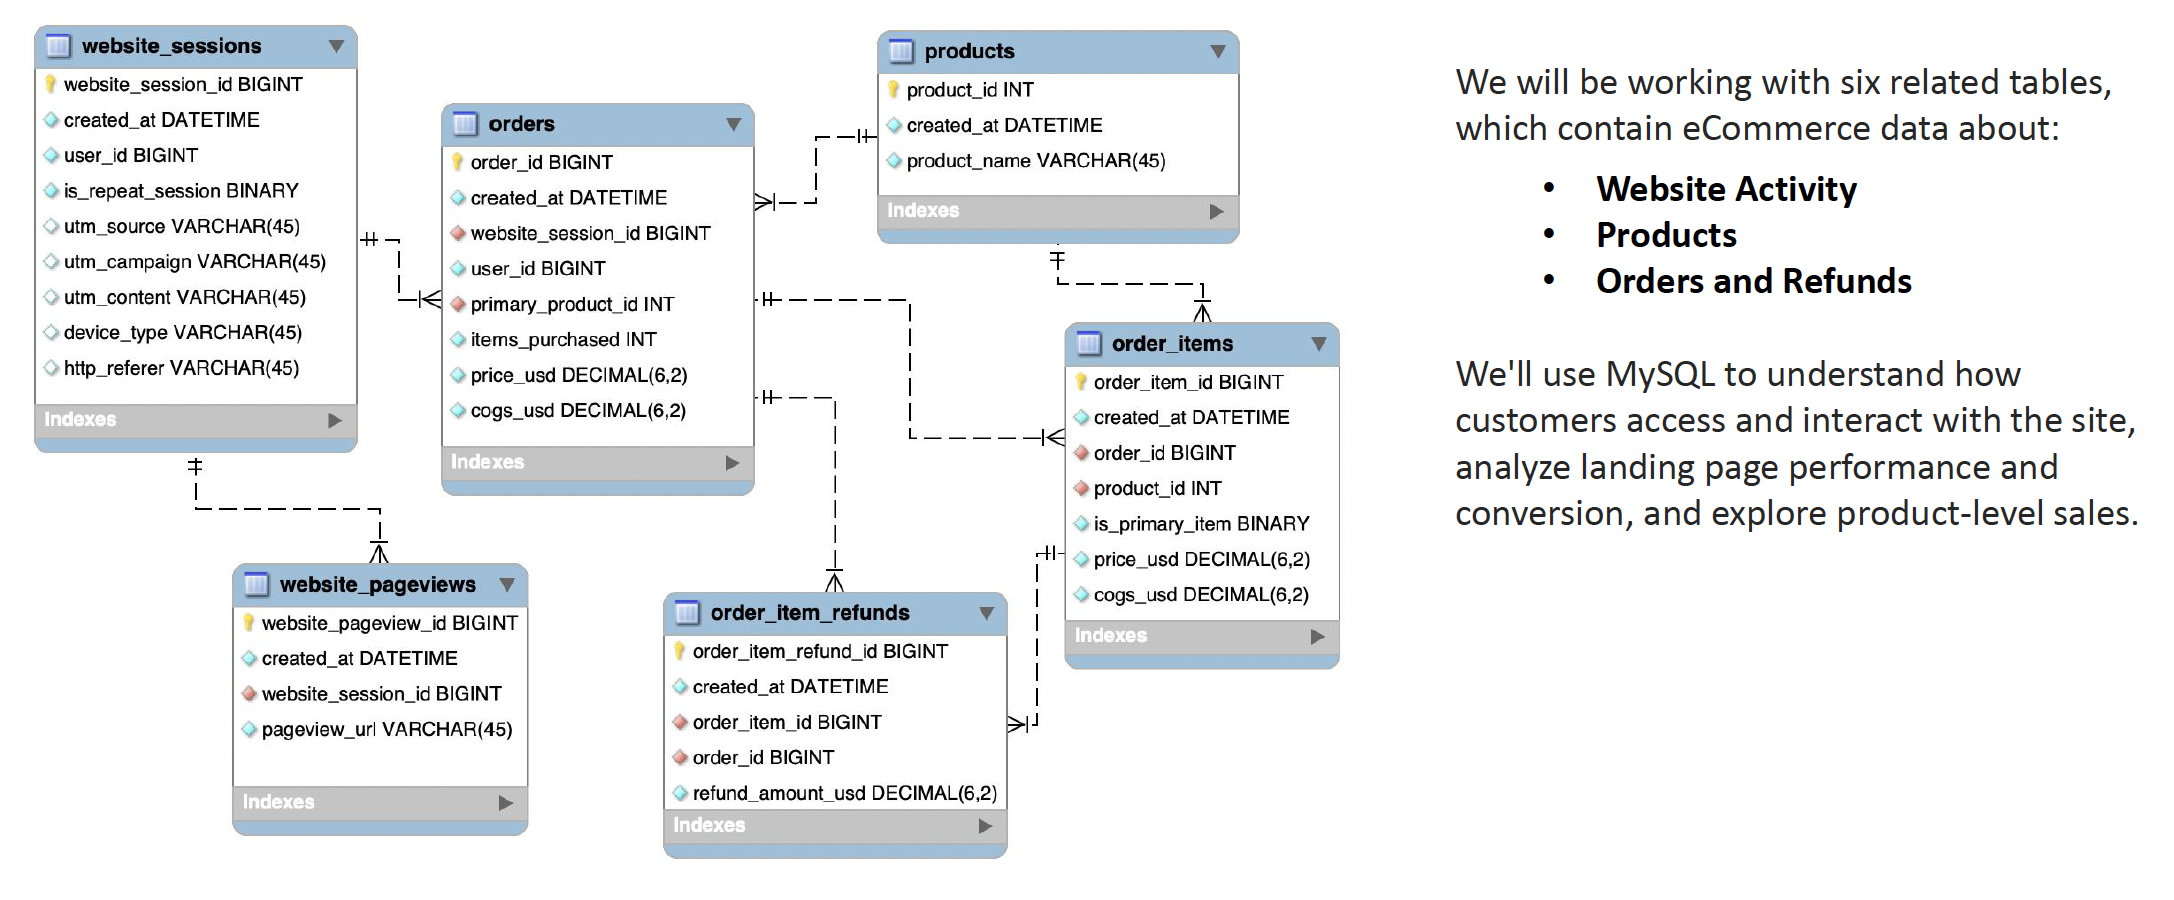

In [3]:
query = '''
SELECT *
FROM website_sessions WHERE website_session_id = 1059
'''
df = pd.read_sql_query(query,conn)
df

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1059,2012-03-26 13:51:37,1055,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com


In [4]:
query = '''
SELECT *
FROM website_pageviews WHERE website_session_id = 1059
'''
df = pd.read_sql_query(query,conn)
df

,website_pageview_id,created_at,website_session_id,pageview_url
0,2039,2012-03-26 13:51:37,1059,/home
1,2040,2012-03-26 13:54:27,1059,/products
2,2041,2012-03-26 13:56:48,1059,/the-original-mr-fuzzy
3,2042,2012-03-26 14:00:14,1059,/cart
4,2043,2012-03-26 14:04:06,1059,/shipping
5,2044,2012-03-26 14:05:47,1059,/billing
6,2045,2012-03-26 14:13:56,1059,/thank-you-for-your-order


In [5]:
query = '''
SELECT *
FROM orders WHERE website_session_id = 1059
'''
df = pd.read_sql_query(query,conn)
df

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,32,2012-03-26 14:13:56,1059,1055,1,1,49.99,19.49


## PAID MARKETING CAMPAIGNS: UTM TRACKING PARAMETERS
When businesses run paid marketing campaigns, they often obsess over performance and
measure everything ; how much they spend, how well traffic converts to sales,
Paid traffic is commonly tagged with tracking (UTM) parameters, which are appended to
URLs and allow us to tie website activity back to specific traffic sources and campaigns

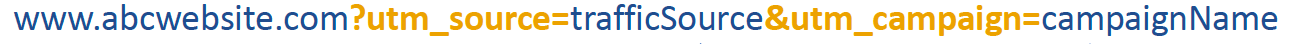

In [6]:
query = '''
SELECT distinct utm_source, utm_campaign
FROM website_sessions
'''
df = pd.read_sql_query(query,conn)
df

,utm_source,utm_campaign
0,gsearch,nonbrand
1,None,None
2,gsearch,brand
3,bsearch,brand
4,bsearch,nonbrand
5,socialbook,pilot
6,socialbook,desktop_targeted


In [7]:
query = '''
SELECT distinct utm_source
    ,count(distinct w.website_session_id) as sessions
    ,count(distinct o.order_id) as orders
FROM website_sessions w
left join orders O
on w.website_session_id = o.website_session_id
group by 1
'''
df = pd.read_sql_query(query,conn)
df

,utm_source,sessions,orders
0,None,83328,6118
1,bsearch,62823,4519
2,gsearch,316035,21333
3,socialbook,10685,343


In [8]:
query = '''

SELECT distinct utm_source
    ,count(distinct w.website_session_id) as sessions
    ,count(distinct o.order_id) as orders
FROM website_sessions w
left join orders O
on w.website_session_id = o.website_session_id
where w.website_session_id between 1000 and 2000
group by 1

'''
df = pd.read_sql_query(query,conn)
df

,utm_source,sessions,orders
0,None,18,0
1,bsearch,2,0
2,gsearch,981,35


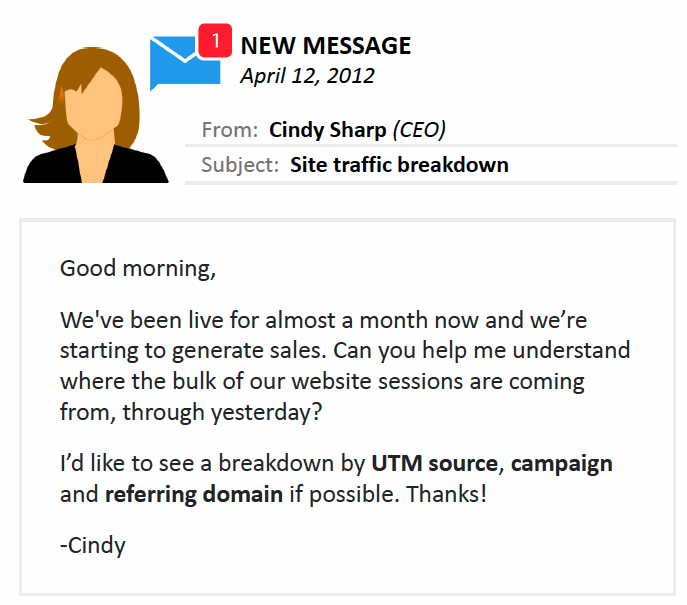

In [10]:
query = '''

SELECT utm_source
    ,utm_campaign
    ,http_referer
    ,count(distinct w.website_session_id) as sessions
FROM website_sessions w
where created_at < '2012-04-12'
group by 1,2,3
order by 4 desc
'''
df = pd.read_sql_query(query,conn)
df

,utm_source,utm_campaign,http_referer,sessions
0,gsearch,nonbrand,https://www.gsearch.com,3613
1,None,None,None,28
2,None,None,https://www.gsearch.com,27
3,gsearch,brand,https://www.gsearch.com,26
4,None,None,https://www.bsearch.com,7
5,bsearch,brand,https://www.bsearch.com,7


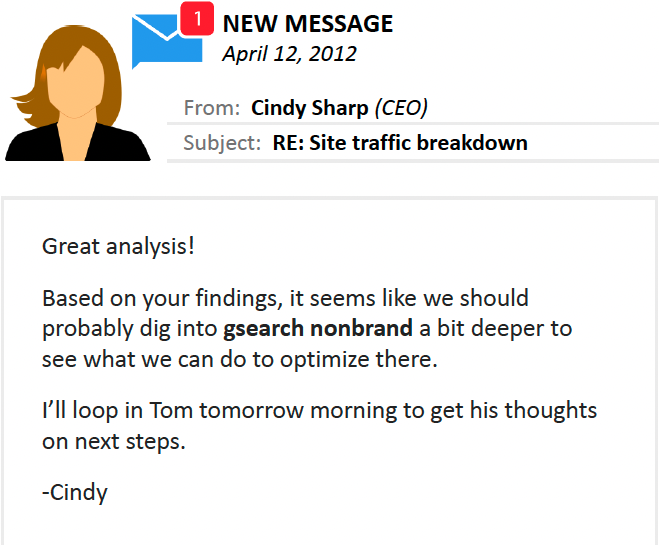

## NEXT STEPS
- Drill deeper into gsearch nonbrand campaign traffic to explore potential optimization opportunities
- Await further instruction from Tom

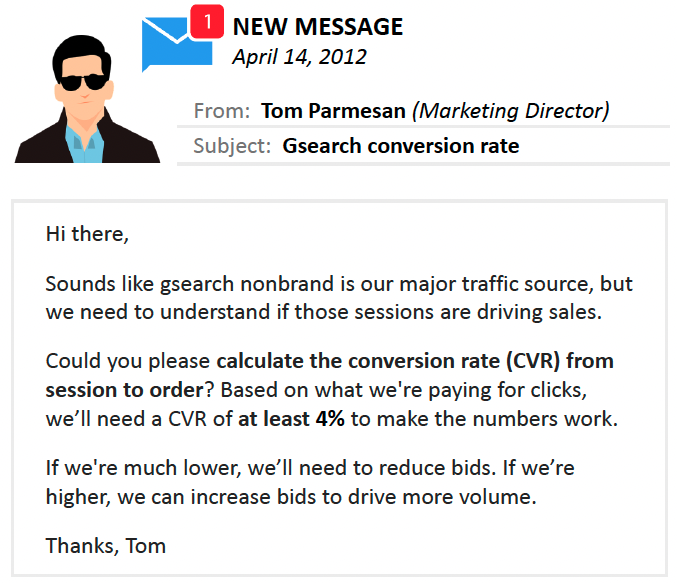

In [11]:
query = '''

SELECT
    count(distinct w.website_session_id) as sessions
    ,count(distinct o.order_id) as orders
FROM website_sessions w
left join orders O
on w.website_session_id = o.website_session_id
where w.created_at < '2012-04-14'
and utm_source = 'gsearch'
and utm_campaign = 'nonbrand'

'''
df = pd.read_sql_query(query,conn)
df

,sessions,orders
0,3895,112


In [12]:
query = '''

SELECT
    count(distinct w.website_session_id) as sessions
    ,count(distinct o.order_id) as orders
    ,count(distinct o.order_id)/count(distinct w.website_session_id) as cvr
FROM website_sessions w
left join orders O
on w.website_session_id = o.website_session_id
where w.created_at < '2012-04-14'
and utm_source = 'gsearch'
and utm_campaign = 'nonbrand'

'''
df = pd.read_sql_query(query,conn)
df

,sessions,orders,cvr
0,3895,112,0.0288


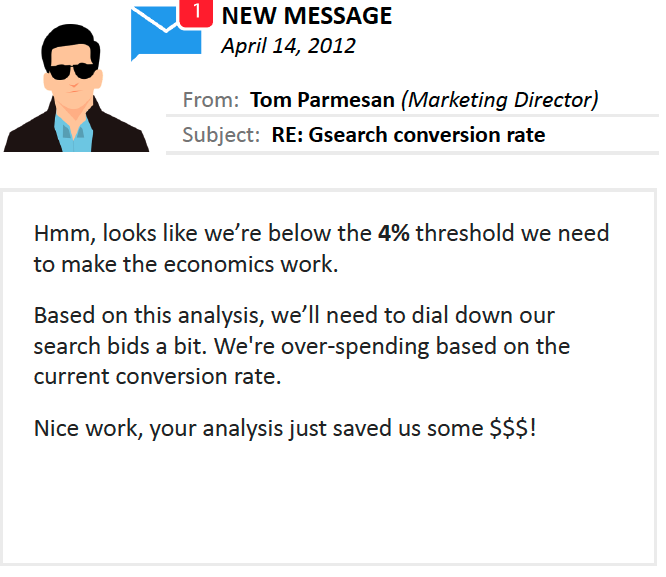

## Next Steps
- Monitor the impact of bid reduction
- Analyze performance trending by device type in order to refine bidding strategy